<a href="https://colab.research.google.com/github/MaxYarosh/ML-projects/blob/main/Simple_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import Perceptron as SkPerceptron
from sklearn.metrics import accuracy_score

In [22]:
# --- Реалізація простого Перцептрона ---
class Perceptron:
    def __init__(self, lr=0.1, n_epochs=1000):
        self.lr = lr
        self.n_epochs = n_epochs

    def fit(self, X, y):
        y_mod = np.where(y == 0, -1, 1)
        self.w = np.zeros(X.shape[1])

        for _ in range(self.n_epochs):
            for xi, target in zip(X, y_mod):
                update = self.lr * target if target * np.dot(xi, self.w) <= 0 else 0
                self.w += update * xi

    def predict(self, X):
        return np.where(np.dot(X, self.w) >= 0, 1, 0)

In [23]:
# --- Генерація даних ---
X, y = make_classification(
    n_samples=200, n_features=2, n_redundant=0, n_informative=2,
    n_clusters_per_class=1, random_state=42
)


X_b = np.c_[np.ones((X.shape[0], 1)), X]

In [25]:
# --- Навчання свого Перцептрона ---
my_perc = Perceptron(lr=0.1, n_epochs=10)
my_perc.fit(X_b, y)
y_pred_my = my_perc.predict(X_b)
acc_my = accuracy_score(y, y_pred_my)

In [26]:
# --- Навчання sklearn Перцептрона ---
sk_perc = SkPerceptron(max_iter=1000, eta0=0.1, tol=1e-3, random_state=42)
sk_perc.fit(X, y)
y_pred_sk = sk_perc.predict(X)
acc_sk = accuracy_score(y, y_pred_sk)

print(f"Accuracy (My Perceptron): {acc_my:.3f}")
print(f"Accuracy (Sklearn Perceptron): {acc_sk:.3f}")

Accuracy (My Perceptron): 0.615
Accuracy (Sklearn Perceptron): 0.790


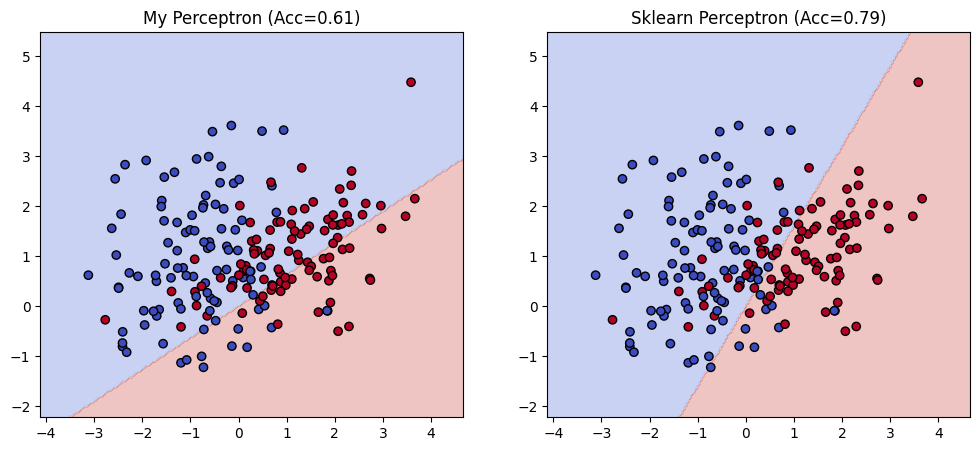

In [27]:
# ---  Візуалізація межі класифікації ---
def plot_decision_boundary(X, y, model, with_bias=True):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                         np.linspace(y_min, y_max, 200))
    X_grid = np.c_[np.ones((xx.ravel().shape[0], 1)), xx.ravel(), yy.ravel()] if with_bias else np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors="k")

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plot_decision_boundary(X, y, my_perc, with_bias=True)
plt.title(f"My Perceptron (Acc={acc_my:.2f})")

plt.subplot(1,2,2)
plot_decision_boundary(X, y, sk_perc, with_bias=False)
plt.title(f"Sklearn Perceptron (Acc={acc_sk:.2f})")

plt.show()
